In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv("/Users/martinyeh/Desktop/DeepLearning_WU/myproject/RNN/dataset/train.csv",header=None)
print(train.head())

                             0  1   2     3
0  French macaroon is so tasty  4 NaN   NaN
1             work is horrible  3 NaN   NaN
2                   I am upset  3 NaN   [3]
3               throw the ball  1 NaN   [2]
4                    Good joke  2 NaN   NaN


In [3]:
X_train = train[0]
Y_train = train[1]

In [4]:
for idx in range(10):
    print(X_train[idx], label_to_emoji(Y_train[idx]))

French macaroon is so tasty 🍴
work is horrible 😞
I am upset 😞
throw the ball ⚾
Good joke 😄
what is your favorite baseball game ⚾
I cooked meat 🍴
stop messing around 😞
I want chinese food 🍴
Let us go play baseball ⚾


In [5]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('/Users/martinyeh/Desktop/DeepLearning_WU/myproject/RNN/dataset/glove.6B.50d.txt')

word_to_index: dictionary mapping from words to their indices in the vocabulary
(400,001 words, with the valid indices ranging from 0 to 400,000)

index_to_word: dictionary mapping from indices to their corresponding words in the vocabulary

word_to_vec_map: dictionary mapping words to their GloVe vector representation.

In [6]:
def sentence_to_avg(sentence, word_to_vec_map):
    """
    Converts a sentence (string) into a list of words (strings). Extracts the GloVe representation of each word
    and averages its value into a single vector encoding the meaning of the sentence.
    
    Arguments:
    sentence -- string, one training example from X
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    
    Returns:
    avg -- average vector encoding information about the sentence, numpy-array of shape (50,)
    """
    
    # Step 1: Split sentence into list of lower case words (≈ 1 line)
    words = (((sentence.lower()).strip()).split(" "))

    # Initialize the average word vector, should have the same shape as your word vectors.
    avg = np.zeros(word_to_vec_map[words[0]].shape)
    
    # Step 2: average the word vectors. You can loop over the words in the list "words".
    total = 0
    for w in words:
        total += word_to_vec_map[w]
    avg = total/len(words)
    
    return avg

In [7]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    """
    Model to train word vector representations in numpy.
    
    Arguments:
    X -- input data, numpy array of sentences as strings, of shape (m, 1)
    Y -- labels, numpy array of integers between 0 and 7, numpy-array of shape (m, 1)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    learning_rate -- learning_rate for the stochastic gradient descent algorithm
    num_iterations -- number of iterations
    
    Returns:
    pred -- vector of predictions, numpy-array of shape (m, 1)
    W -- weight matrix of the softmax layer, of shape (n_y, n_h)
    b -- bias of the softmax layer, of shape (n_y,)
    """

    costs = []

    # Define number of training examples
    m = Y.shape[0]                          # number of training examples
    n_y = 5                                 # number of classes  
    n_h = 50                                # dimensions of the GloVe vectors 
    
    # Initialize parameters using Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # Convert Y to Y_onehot with n_y classes
    Y_oh = to_categorical(Y, num_classes = n_y)
    
    # Optimization loop
    for t in range(num_iterations): # Loop over the number of iterations
        for i in range(m):          # Loop over the training examples
            
            # Average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)

            # Forward propagate the avg through the softmax layer
            z = np.dot(W,avg)+b
            a = softmax(z)

            # Compute cost using the i'th training label's one hot representation and "A" (the output of the softmax)
            cost = -(np.sum(np.multiply(Y_oh[i],np.log(a))))
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 50 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            costs.append(cost)
            pred = predict1(X, Y, W, b, word_to_vec_map) #predict is defined in emo_utils.py
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fifty)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
            

    return pred, W, b

Epoch: 0 --- cost = 1.0647855967284254
Accuracy: 0.30601092896174864
Epoch: 50 --- cost = 0.7556316025266457
Accuracy: 0.819672131147541
Epoch: 100 --- cost = 0.6185569582382959
Accuracy: 0.8524590163934426
Epoch: 150 --- cost = 0.5358285958229806
Accuracy: 0.8797814207650273
Epoch: 200 --- cost = 0.47873499315199564
Accuracy: 0.8907103825136612
Epoch: 250 --- cost = 0.43465229526764376
Accuracy: 0.912568306010929
Epoch: 300 --- cost = 0.3980884165549479
Accuracy: 0.912568306010929
Epoch: 350 --- cost = 0.3665311913562429
Accuracy: 0.9234972677595629


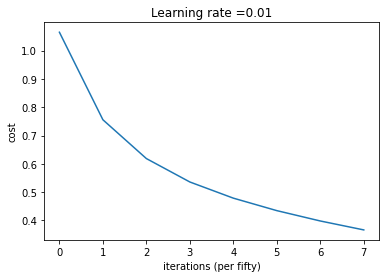

In [8]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)

In [9]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict2(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.6666666666666666

i adore you 😄
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
test = pd.read_csv("/Users/martinyeh/Desktop/DeepLearning_WU/myproject/RNN/dataset/test.csv",header=None)
X_test = test[0]
Y_test = test[1]

In [12]:
pred = predict1(X_test,Y_test,W,b,word_to_vec_map)
print(classification_report(Y_test.values, pred))
confusion_matrix(Y_test.values, pred)

Accuracy: 0.8928571428571429
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       1.00      1.00      1.00         5
           2       0.81      0.94      0.87        18
           3       0.87      0.87      0.87        15
           4       1.00      1.00      1.00         6

    accuracy                           0.89        56
   macro avg       0.94      0.91      0.92        56
weighted avg       0.90      0.89      0.89        56



array([[ 9,  0,  2,  1,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0, 17,  1,  0],
       [ 0,  0,  2, 13,  0],
       [ 0,  0,  0,  0,  6]])